In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

In [15]:
def metric_count():
    active_studs = pd.read_csv('Проект_2_active_studs.csv')
    checks = pd.read_csv('Проект_2_checks.csv', sep = ';')
    group_add = pd.read_csv('Проект_2_group_add.csv')
    groups = pd.read_csv('Проект_2_groups.csv', sep = ';')
    group_add = group_add.rename(columns = {group_add.columns[0] : groups.columns[0], group_add.columns[1] : groups.columns[1]})
    
    group_final = groups.append(group_add)
    
    active_in_group = active_studs.merge(group_final, how = 'left', left_on = 'student_id', right_on = 'id')
    active_in_group = active_in_group.drop('id', axis = 1)
    
    full_df = active_in_group.merge(checks, on = 'student_id',how = 'left')
    
    extra_users = checks[~checks.student_id.isin(active_in_group.student_id)]
    extra_users = extra_users.merge(group_final, how = 'left', left_on = 'student_id', right_on = 'id')
    extra_users = extra_users.drop('id', axis = 1)
    full_df = pd.concat([full_df, extra_users], ignore_index = True)
    
    full_df.rev = full_df.rev.fillna(0)
    
    full_df['customer'] = full_df.rev.apply(lambda x: 1 if x > 0 else 0)
    
    summary_table = full_df.groupby('grp').agg(
    Total_Revenue=('rev', 'sum'),  # Суммарная выручка
    Total_Customers=('customer', 'sum'),  # Сумма покупателей
    Total_Users=('student_id', 'count')  # Общее количество пользователей
    ).reset_index()
    
    summary_table['CR'] = (summary_table['Total_Customers'] / summary_table['Total_Users']) * 100
    summary_table['ARPU'] = summary_table['Total_Revenue'] / summary_table['Total_Users']
    summary_table['ARPPU'] = summary_table.apply(
    lambda row: row['Total_Revenue'] / row['Total_Customers'] if row['Total_Customers'] > 0 else 0,
    axis=1
    )
    
    return summary_table

In [16]:
metric_count()

,grp,Total_Revenue,Total_Customers,Total_Users,CR,ARPU,ARPPU
0,A,92096.0000,107,1567,6.828334,58.772176,860.710280
1,B,481230.0036,434,6923,6.268959,69.511773,1108.824893


In [17]:
def grafic_draw():
    active_studs = pd.read_csv('Проект_2_active_studs.csv')
    checks = pd.read_csv('Проект_2_checks.csv', sep = ';')
    group_add = pd.read_csv('Проект_2_group_add.csv')
    groups = pd.read_csv('Проект_2_groups.csv', sep = ';')
    group_add = group_add.rename(columns = {group_add.columns[0] : groups.columns[0], group_add.columns[1] : groups.columns[1]})
    
    group_final = groups.append(group_add)
    
    active_in_group = active_studs.merge(group_final, how = 'left', left_on = 'student_id', right_on = 'id')
    active_in_group = active_in_group.drop('id', axis = 1)
    
    full_df = active_in_group.merge(checks, on = 'student_id',how = 'left')
    
    extra_users = checks[~checks.student_id.isin(active_in_group.student_id)]
    extra_users = extra_users.merge(group_final, how = 'left', left_on = 'student_id', right_on = 'id')
    extra_users = extra_users.drop('id', axis = 1)
    full_df = pd.concat([full_df, extra_users], ignore_index = True)
    
    full_df.rev = full_df.rev.fillna(0)
    
    full_df_cust = full_df.query('rev > 0')
    full_df['customer'] = full_df.rev.apply(lambda x: 1 if x > 0 else 0)
    
    fig, axs = plt.subplots(3, 1, figsize=(16, 18))

    sns.histplot(data=full_df_cust.query('grp == "A"'), x='rev', ax=axs[0])
    axs[0].set_title('Контрольная группа \n', size=20)
    axs[0].set_xlabel('Размер чека', size=15)
    axs[0].set_ylabel('Число людей \n', size=15)
    
    sns.histplot(data=full_df_cust.query('grp == "B"'), x='rev', ax=axs[1])
    axs[1].set_title('Тестовая группа \n', size=20)
    axs[1].set_xlabel('Размер чека', size=15)
    axs[1].set_ylabel('Число людей \n', size=15)

    sns.histplot(data=full_df, x='customer', hue='grp', multiple='stack', bins=3, ax=axs[2])
    axs[2].set_title('Распределение клиентов по группам \n', size=20)
    axs[2].set_xlabel('Клиенты', size=15)
    axs[2].set_ylabel('Число людей \n', size=15)

    plt.tight_layout() 
    plt.show()

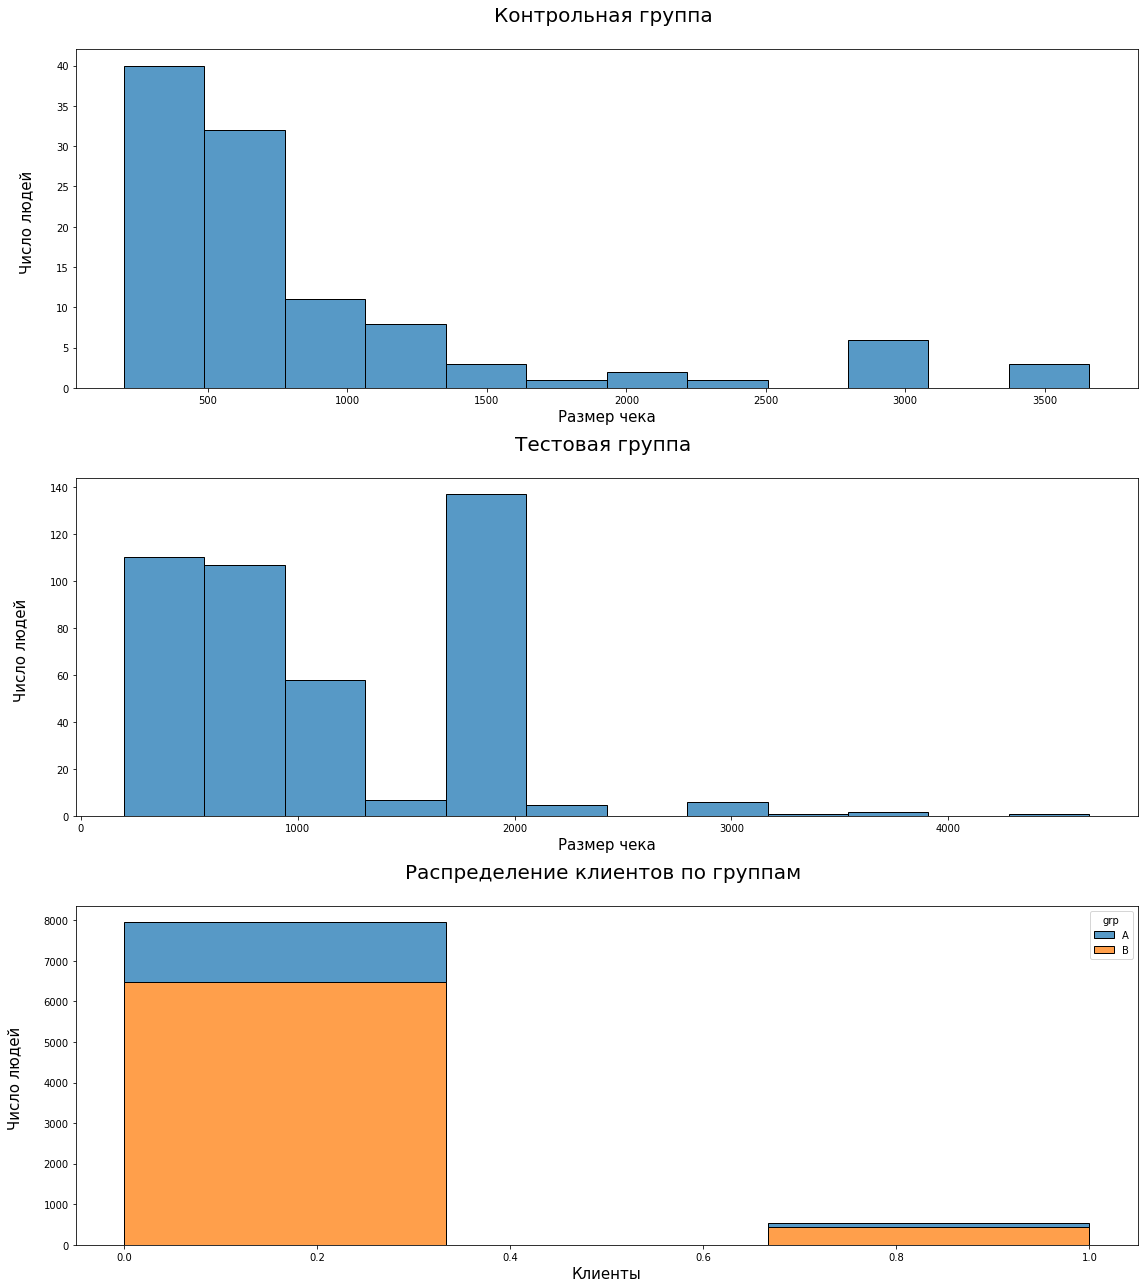

In [18]:
grafic_draw()